<a href="https://colab.research.google.com/github/Jigyasa022303/workshop/blob/master/2505472_Jigyasa_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Data Exploration and Understanding:
#1. Load the dataset and display the first 10 rows.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use seaborn style
csv_path = '/content/WHR20245CS037_a1bfcb8e-f3d5-49cf-9072-5f0f6923bbef_264243_ (1).csv'
df = pd.read_csv(csv_path)
# 1. first 10 rows
print("First 10 rows:")
display(df.head(10))

First 10 rows:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [2]:
#2. Identify the number of rows and columns in the dataset.
#3. List all the columns and their data types.
print("\nShape:",df.shape)
print("\nColumn dtypes:")
print(df.dtypes)



Shape: (143, 9)

Column dtypes:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [3]:
 #1. Calculate the mean, median, and standard deviation for the Score column.
df['score'] = df['score'].astype(float)
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std(ddof=0)
print(f"\nScore: mean={mean_score:.4f}, median={median_score:.4f}, std={std_score:.4f}")


Score: mean=5.5276, median=5.7850, std=1.1666


In [4]:
#2. Identify the country with the highest and lowest happiness scores.
highest = df.loc[df['score'].idxmax(), ['Country name', 'score']]
lowest  = df.loc[df['score'].idxmin(), ['Country name', 'score']]

print("\nHighest:", highest.to_dict())
print("Lowest: ", lowest.to_dict())



Highest: {'Country name': 'Finland', 'score': 7.741}
Lowest:  {'Country name': 'Afghanistan', 'score': 1.721}


In [5]:
# Missing Values:
 #1. Check if there are any missing values in the dataset. If so, display the total count for each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [6]:
 #Filtering and Sorting:
 #1. Filter the dataset to show only the countries with a Score greater than 7.5.
 #2. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display thetop 10 rows
df.loc[df['score'] > 7.5, ['Country name', 'score']].sort_values(by='score', ascending=False).head()


,Country name,score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525


In [7]:
filtered =df.sort_values(by='Log GDP per capita',ascending =False).head(10)
filtered

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


In [8]:
# 6. add Happiness Category
def categorize(s):
    s = float(s)
    if s < 4: return 'Low'
    if 4 <= s <= 6: return 'Medium'
    return 'High'
df['Happiness Category'] = df['score'].apply(categorize)
print("\nHappiness Category counts:")
print(df['Happiness Category'].value_counts())


Happiness Category counts:
Happiness Category
Medium    70
High      56
Low       17
Name: count, dtype: int64


In [9]:
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


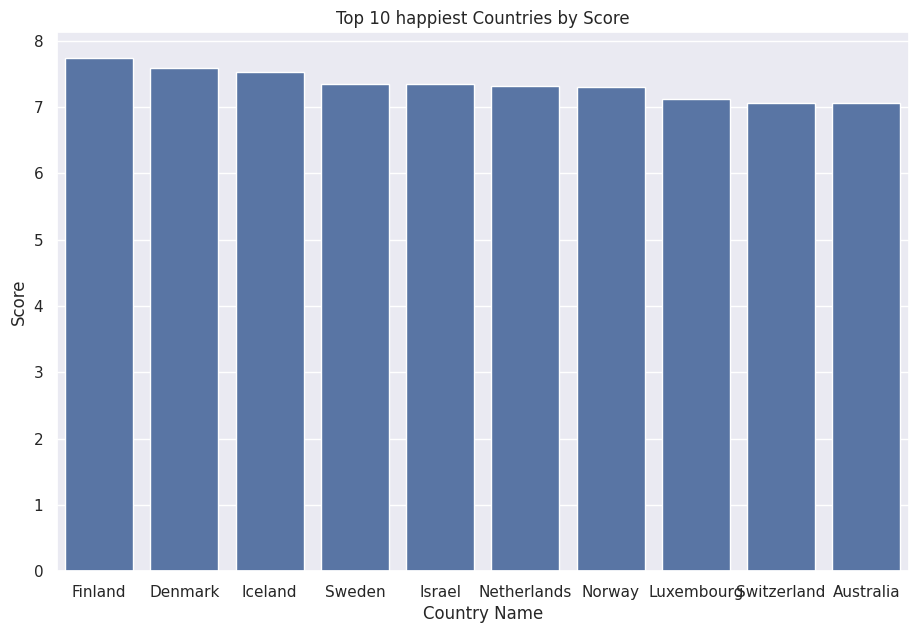

In [10]:
#2. Data Visualizations:• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
largest = df.nlargest(10,'score')
plt.figure(figsize=(11,7))
sns.barplot(x='Country name',y='score',data=largest)
plt.xlabel("Country Name")
plt.ylabel("Score")
plt.title("Top 10 happiest Countries by Score")
plt.show()


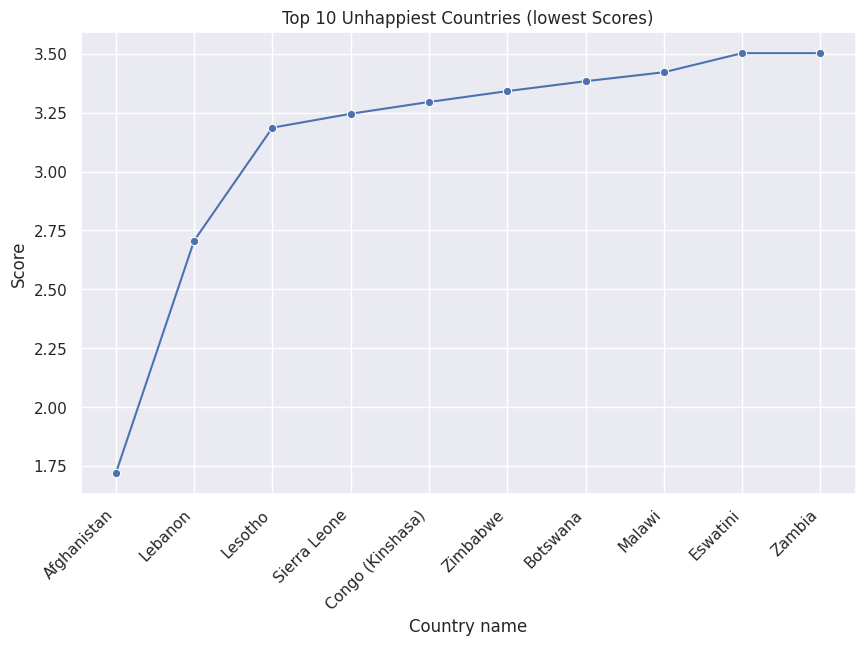

In [11]:
 #• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
plt.figure(figsize=(10,6))
bottom10 = df.sort_values(by='score').head(10)
sns.lineplot(x=bottom10['Country name'], y=bottom10['score'], marker='o')
plt.title('Top 10 Unhappiest Countries (lowest Scores)')
plt.xticks(rotation=45, ha='right'); plt.ylabel('Score'); plt.show()

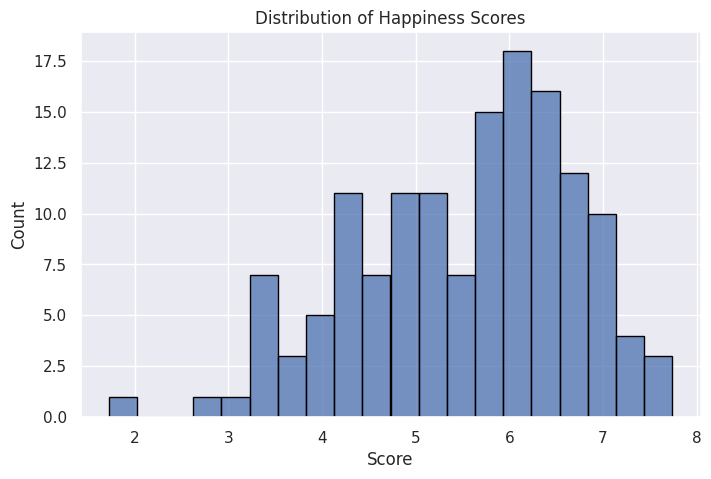

In [12]:
#• Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(8,5))
sns.histplot(df['score'].dropna(), bins=20,edgecolor='black')
plt.title('Distribution of Happiness Scores'); plt.xlabel('Score'); plt.show()

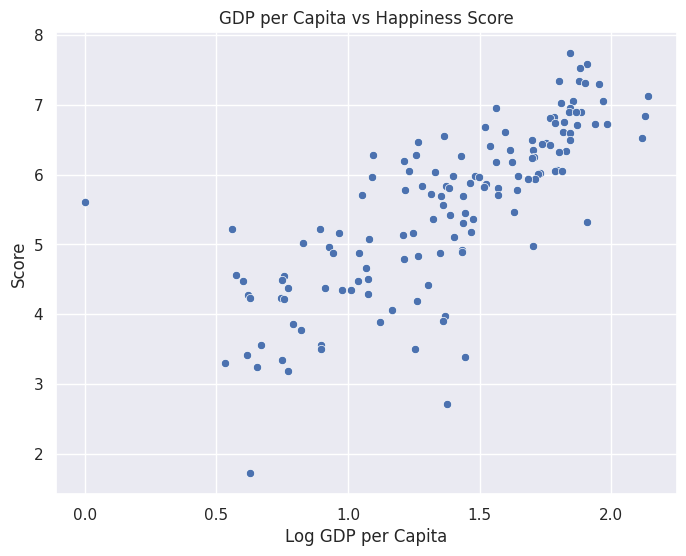

In [13]:
 #• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Log GDP per capita'].astype(float), y=df['score'].astype(float))
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita'); plt.ylabel('Score'); plt.show()

In [14]:
#problem -2# task1
#1. Define the countries in South Asia with a list for example:
 #south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
 #"Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter dataset for South Asian countries
df_south = df[df["Country name"].isin(south_asia)]

# Show filtered data
print("South Asia Dataset:")
print(df_south)



South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of

In [15]:
#3. Save the filtered dataframe as separate CSV files for future use.
df_south.to_csv('south_asia_filtered.csv', index=False)
print("Saved south_asia_filtered.csv")

Saved south_asia_filtered.csv


In [16]:
#task- 2- Composite Score Ranking:
 #1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
 #Composite Score = 0.40×GDP per Capita+0.30×Social Support+0.30 ×Healthy Life Expectancy
df_south["Composite Score"] = (
     0.40 * df_south["Log GDP per capita"]
    + 0.30 * df_south["Social support"]
    + 0.30 * df_south["Healthy life expectancy"]
)
df_south





/tmp/ipython-input-2302650037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south["Composite Score"] = (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [17]:
#2. Rank the South Asian countries based on the Composite Score in descending order.
ranked =df_south.sort_values(by="Composite Score",ascending=False)
ranked

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


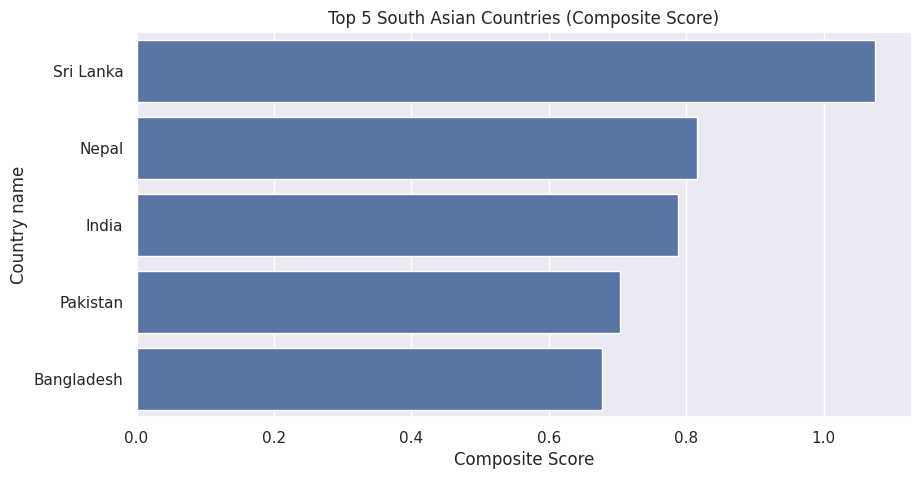

In [18]:
 #3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
ranked =df_south.sort_values(by="Composite Score",ascending=False)
ranked
top5 = ranked.head(5)
plt.figure(figsize=(10,5))
sns.barplot(y="Country name", x="Composite Score", data=top5)
plt.title("Top 5 South Asian Countries (Composite Score)")
plt.show()


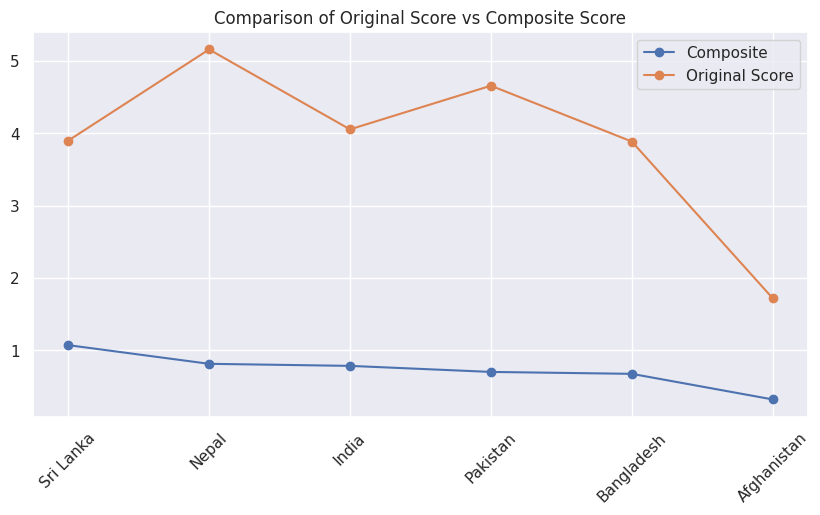

In [19]:
 #4. Discuss whether the rankings based on the Composite Score align with the original Score- support your discussion with some visualization plot

plt.figure(figsize=(10,5))
plt.plot(ranked["Country name"], ranked["Composite Score"], marker='o', label="Composite")
plt.plot(ranked["Country name"], ranked["score"], marker='o', label="Original Score")
plt.xticks(rotation=45)
plt.legend()
plt.title("Comparison of Original Score vs Composite Score")
plt.show()

In [20]:
#Task- 3- Outlier Detection:
 #1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
 #2. Define outliers using the 1.5 × IQR rule.

def iqr_outliers(column):
    q1 = df_south[column].quantile(0.25)
    q3 = df_south[column].quantile(0.75)
    iqr = q3 - q1
    return  df_south[(df_south[column] < q1 - 1.5 * iqr) | (df_south[column] > q3 + 1.5 * iqr)]

# Outliers in Score and GDP
outliers_score = iqr_outliers('score')
outliers_gdp =iqr_outliers('Log GDP per capita')

print('Outliers Based on Score:\n', outliers_score)
print('Outliers Based on GDP per Capita:\n', outliers_gdp)



Outliers Based on Score:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  
142           0.3238  
Outliers Based on GDP per Capita:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  
142           0.3238

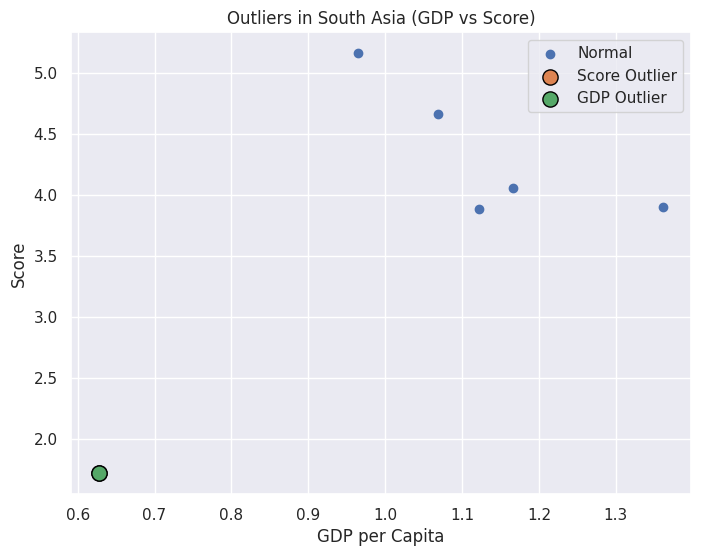

In [21]:
#3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
# Scatter plot
plt.figure(figsize=(8,6))

plt.scatter(df_south["Log GDP per capita"], df_south["score"], label="Normal")

# Plot Score outliers in red
plt.scatter(outliers_score["Log GDP per capita"], outliers_score["score"],
            s=120, edgecolors="black", label="Score Outlier")

# Plot GDP outliers in green
plt.scatter(outliers_gdp["Log GDP per capita"], outliers_gdp["score"],
            s=120, edgecolors="black", label="GDP Outlier")

plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.title("Outliers in South Asia (GDP vs Score)")
plt.legend()
plt.show()

In [22]:
#Task- 4- Exploring Trends Across Metrics:
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation{pearson correlation} with the Score for South Asian countries.
#3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries
corr_freedom = df_south["Freedom to make life choices"].corr(df_south["score"])
corr_generosity = df_south["Generosity"].corr(df_south["score"])

print("Correlation (Freedom vs Score):", corr_freedom)
print("Correlation (Generosity vs Score):", corr_generosity)


Correlation (Freedom vs Score): 0.8005185224163315
Correlation (Generosity vs Score): 0.874512371253192


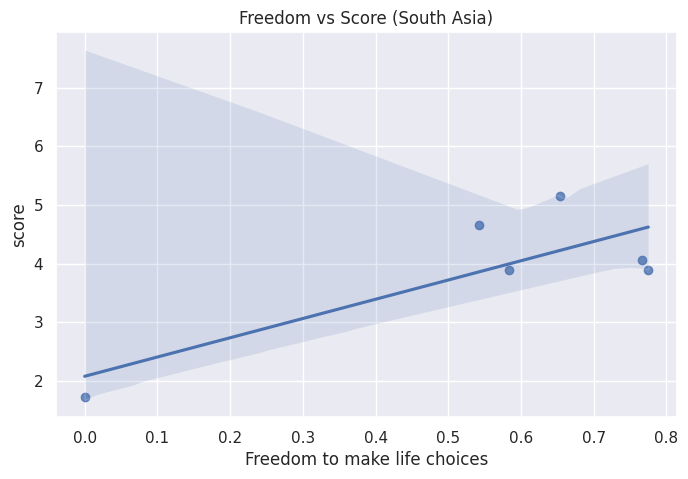

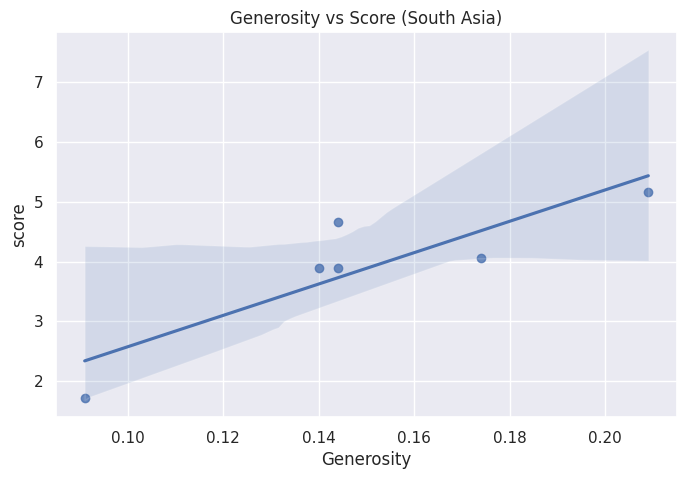

In [23]:
#2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(8,5))
sns.regplot(x="Freedom to make life choices", y="score", data=df_south)
plt.title("Freedom vs Score (South Asia)")
plt.show()

plt.figure(figsize=(8,5))
sns.regplot(x="Generosity", y="score", data=df_south)
plt.title("Generosity vs Score (South Asia)")
plt.show()

In [24]:
#TASK 5 : GAP ANALYSIS
 #1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
 #2. Rank the South Asian countries by this gap in both ascending and descending order.
# Explicitly create a copy to avoid SettingWithCopyWarning and ensure column addition persists
df_south = df_south.copy()
df_south["GDP-Score Gap"] = df_south["Log GDP per capita"] - df_south["score"]
df_south

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [25]:
# Sort ascending → smallest gaps (most negative)
gap_asc = df_south.sort_values(by='GDP-Score Gap')

# Sort descending → largest gaps (most positive)
gap_desc = df_south.sort_values(by='GDP-Score Gap', ascending=False)

print("Smallest Gaps (most negative):", gap_asc.head(3))
print("Largest Gaps (most positive):", gap_desc.head(3))


Smallest Gaps (most negative):     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115                1.783             Medium   
107                      0.074                1.907             Medium   
125                      0.122                0.756             Medium   

     Composite Score  GDP-Score Gap  
92            0.8159         -4.193  
107           0.7039         -3.588  
125     

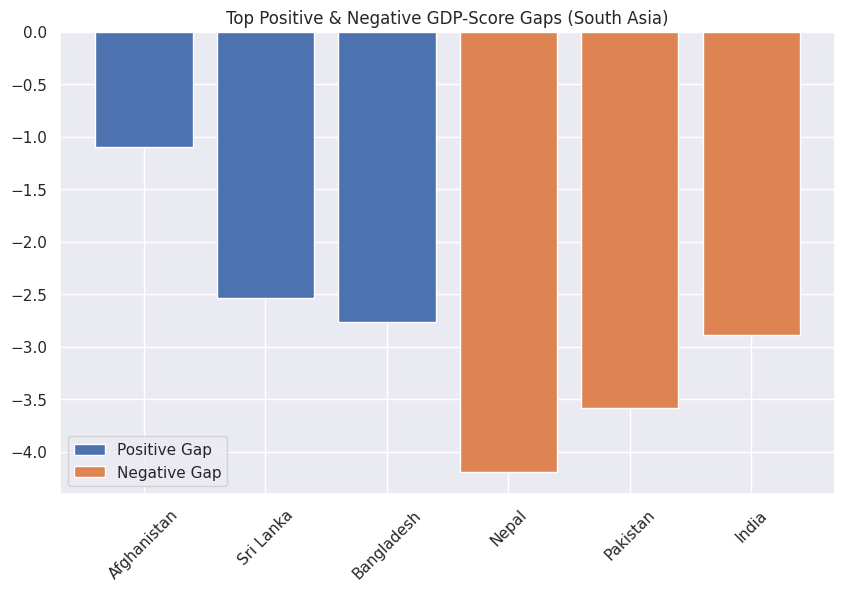

In [26]:
#3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top3_pos = gap_desc.head(3)
top3_neg = gap_asc.head(3)

plt.figure(figsize=(10,6))
plt.bar(top3_pos["Country name"], top3_pos["GDP-Score Gap"], label="Positive Gap")
plt.bar(top3_neg["Country name"], top3_neg["GDP-Score Gap"], label="Negative Gap")
plt.title("Top Positive & Negative GDP-Score Gaps (South Asia)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**4. Analyze the reasons behind these gaps and their implications for South Asian countries**

Ans: The chart shows that South Asia countries like Nepal, Pakistan and India have large negative gaps whereas they have lower happiness score than what their GDP levels would predict. It indicates the moderate economic performance, political instability, unemployment etc. On the other hand, Sri Lanka, Bangladesh and Afghanistan have smaller negative gaps.

The implications for South Asia countries struggle to convert economic growth into real-life wellbeing. This suggest that region needs to focus not only on economic development but also improving social support, health care quantity life.


In [27]:
#problem-3task1
middle_east = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
               "Kuwait", "Lebanon", "Oman", "Palestine",
               "Qatar", "Saudi Arabia", "Syria",
               "United Arab Emirates", "Yemen"]

df_me = df[df["Country name"].isin(middle_east)]
df_me.to_csv("Middle_East.csv", index=False)

df_me

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [28]:
#1. Descriptive Statistics:

print("South Asia Mean:", df_south["score"].mean())
print("Middle East Mean:", df_me["score"].mean())

print("\nSouth Asia Std Dev:", df_south["score"].std())
print("Middle East Std Dev:", df_me["score"].std())


South Asia Mean: 3.895666666666667
Middle East Mean: 5.412100000000001

South Asia Std Dev: 1.1770690152521504
Middle East Std Dev: 1.5662011684327144


**Which region has higher happiness Scores on average?**


Ans: Middle East has higher happiness scores on average.

In [29]:
 #2. Top and Bottom Performers
sa_top = df_south.nlargest(3, "score")
sa_bottom=df_south.nsmallest(3,"score")
me_top = df_me.nlargest(3, "score")
me_bottom = df_me.nsmallest(3, "score")


print("South Asia - Top 3 Countries by Score:")
print(sa_top[['Country name', "score"]])
print("\nSouth Asia - Bottom 3 Countries by Score:")
print(sa_bottom[['Country name', "score"]])
print("\nMiddle East - Top 3 Countries by Score:")
print(me_top[['Country name', "score"]])
print("\nMiddle East - Bottom 3 Countries by Score:")
print(me_bottom[['Country name',"score"]])



South Asia - Top 3 Countries by Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3 Countries by Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3 Countries by Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 Countries by Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


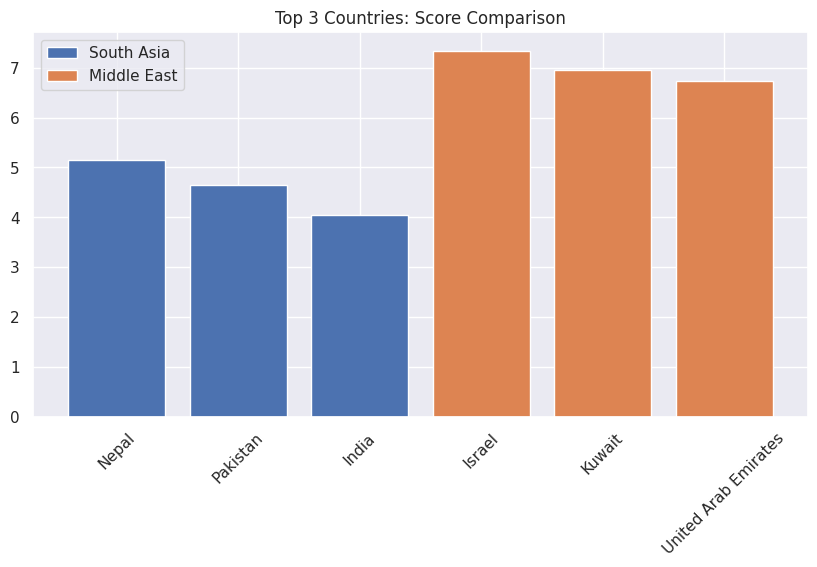

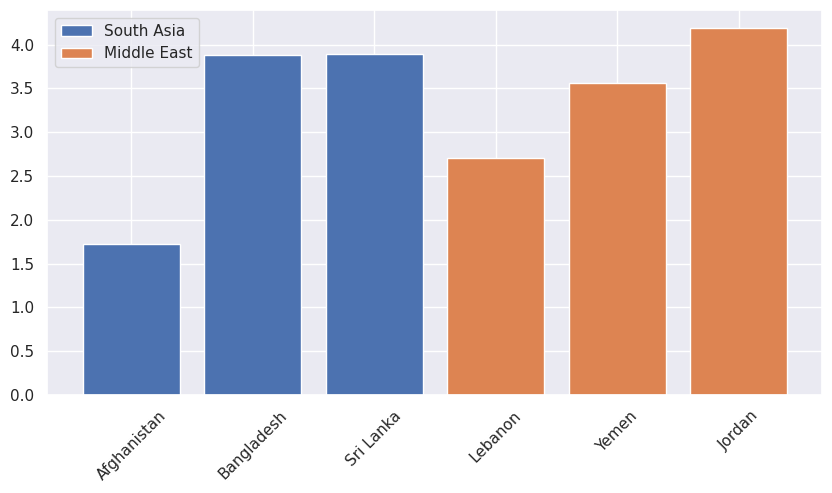

In [30]:
 #Plot bar charts comparing these charts.
sa_top = df_south.nlargest(3, "score")
me_top = df_me.nlargest(3, "score")
sa_buttom=df_south.nsmallest(3,"score")
me_buttom=df_me.nsmallest(3,"score")

plt.figure(figsize=(10,5))
plt.bar(sa_top["Country name"], sa_top["score"], label="South Asia")
plt.bar(me_top["Country name"], me_top["score"], label="Middle East")
plt.title("Top 3 Countries: Score Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(sa_buttom["Country name"],sa_buttom["score"],label="South Asia")
plt.bar(me_buttom["Country name"],me_buttom["score"],label="Middle East")

plt.xticks(rotation=45)
plt.legend()
plt.show()



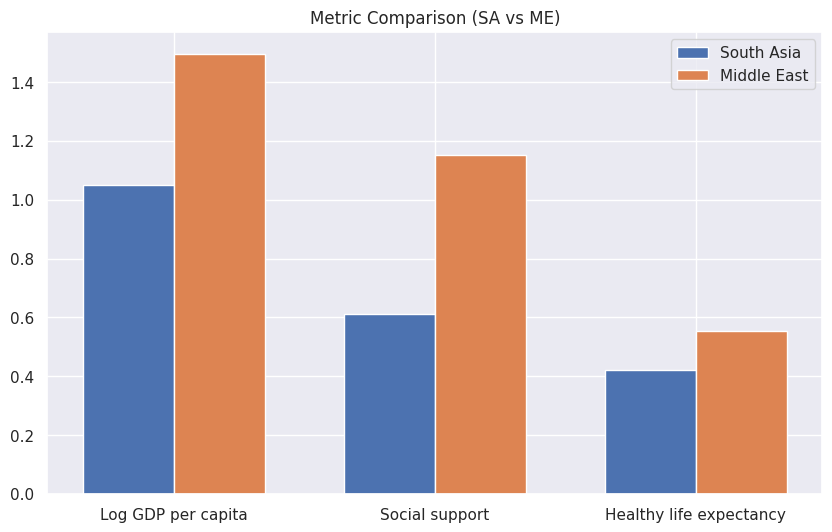

In [31]:
#Metric Comparisons:
metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"]

sa_avg = df_south[metrics].mean()
me_avg = df_me[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, sa_avg, width, label="South Asia")
plt.bar(x + width/2, me_avg, width, label="Middle East")

plt.xticks(x, metrics)
plt.title("Metric Comparison (SA vs ME)")
plt.legend()
plt.show()

In [32]:
#4. Happiness Disparity: Compute the range (max- min) and coefficient of variation (CV) for Score in both regions.
def cv(series):
    return series.std() / series.mean()

print("South Asia Range:", df_south["score"].max() - df_south["score"].min())
print("Middle East Range:", df_me["score"].max() - df_me["score"].min())

print("\nSouth Asia CV:", cv(df_south["score"]))
print("Middle East CV:", cv(df_me["score"]))

South Asia Range: 3.4370000000000003
Middle East Range: 4.634

South Asia CV: 0.3021482883337427
Middle East CV: 0.28938880812119405



**• Which region has greater variability in happiness?**


Ans: South Asia

In [33]:
# 5. Correlation analysis
 #Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
corr_freedom_me = df_me["Freedom to make life choices"].corr(df_me["score"])
corr_generosity_me = df_me["Generosity"].corr(df_me["score"])

print("ME Correlation (Freedom vs Score):", corr_freedom_me)
print("ME Correlation (Generosity vs Score):", corr_generosity_me)

ME Correlation (Freedom vs Score): 0.8632202433827543
ME Correlation (Generosity vs Score): 0.6275236536964182


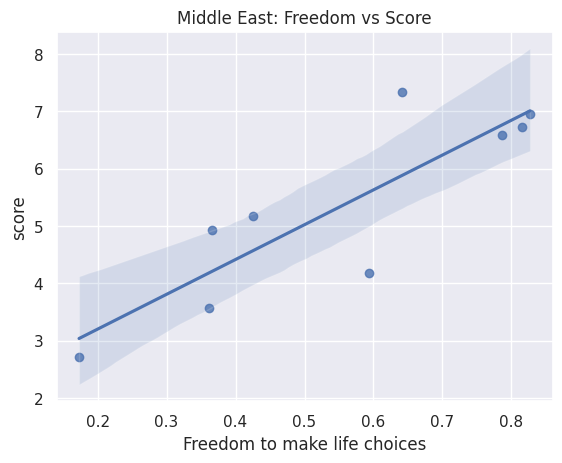

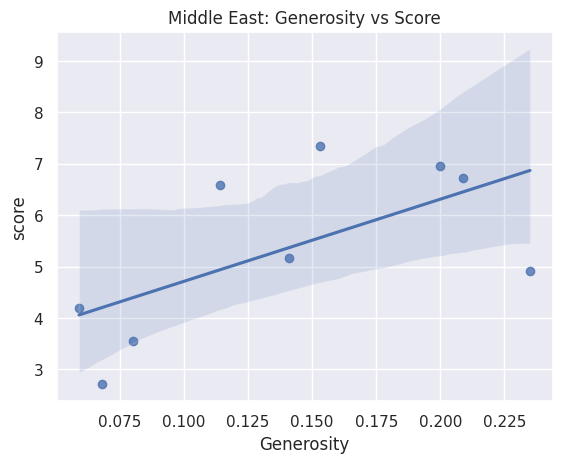

In [34]:
#Create scatter plots to visualize and interpret the relationships
sns.regplot(x="Freedom to make life choices", y="score", data=df_me)
plt.title("Middle East: Freedom vs Score")
plt.show()

sns.regplot(x="Generosity", y="score", data=df_me)
plt.title("Middle East: Generosity vs Score")
plt.show()

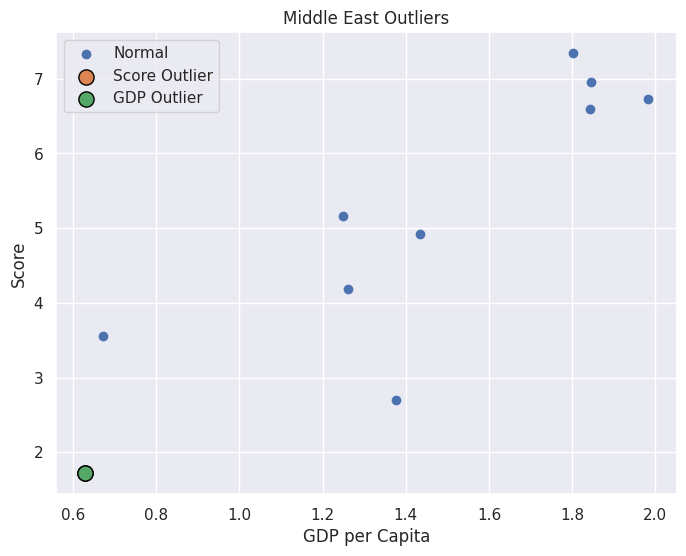

In [35]:
# 6. Outlier Detection:
outliers_score = iqr_outliers("score")
outliers_gdp =iqr_outliers("Log GDP per capita")

plt.figure(figsize=(8,6))
plt.scatter(df_me["Log GDP per capita"], df_me["score"], label="Normal")

plt.scatter(outliers_score["Log GDP per capita"], outliers_score["score"],
            s=120, edgecolors='black', label="Score Outlier")

plt.scatter(outliers_gdp["Log GDP per capita"], outliers_gdp["score"],
            s=120, edgecolors='black', label="GDP Outlier")

plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.title("Middle East Outliers")
plt.legend()
plt.show()



/tmp/ipython-input-790397967.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


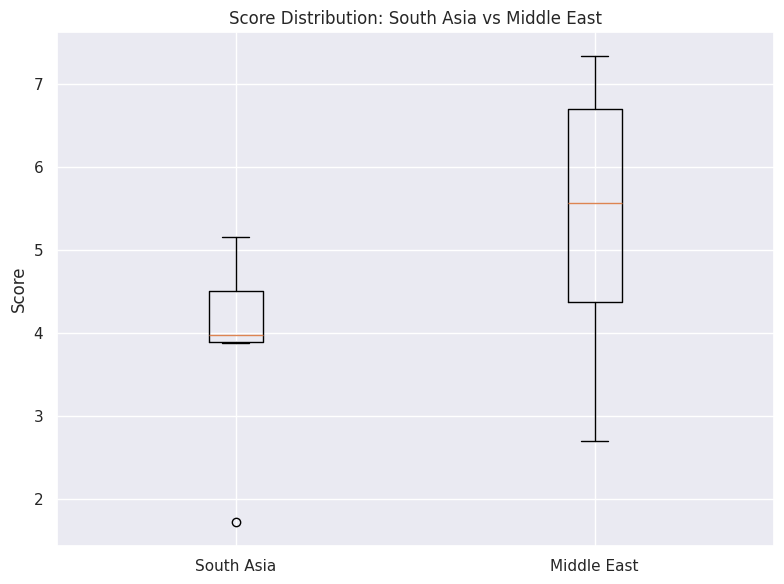

In [36]:
# 7. Visualization:• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(8,6))
data_to_plot = [df_south["score"].astype(float).dropna()]
labels = ['South Asia']
if not df_me.empty:
    data_to_plot.append(df_me["score"].astype(float).dropna()); labels.append('Middle East')
plt.boxplot(data_to_plot, labels=labels)
plt.title("Score Distribution: South Asia vs Middle East")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

** 2.Interpret the key differences in distribution shapes, medians, and outliers.**


 Ans:South Asia score is tightly clustered around a lower median, showing limited variability and lower happiness level. Whereas the Middle East have higher and more varied happiness score. Overall, figure clearly indicates the Middle  East has better in happiness compared to Sout Asia.